In [19]:
# 📦 Libraries for data analysis and visualization
import pandas as pd                # Data manipulation
import numpy as np                 # Numeric calculations
import matplotlib.pyplot as plt    # Plotting
import seaborn as sns              # Visualization styling


In [20]:
# 🎯 Load the dataset
df = pd.read_csv("Fraud_Analysis_Dataset.csv")

# 👁️ Quick peek
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [21]:
# 📉 Statistical summary
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [22]:
# 📋 Dataset shape and structure
print(df.info())
print("=" * 100)
print(f"Dataset Shape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB
None
Dataset Shape: (11142, 10)


In [23]:
# 🔍 Missing values check
print("Missing Values in Each Column:\n", df.isnull().sum())
print("=" * 100)

# 🎯 Unique values in each column
print(f"Unique Values in Dataset:\n{df.nunique()}")

Missing Values in Each Column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64
Unique Values in Dataset:
step                 95
type                  5
amount            10565
nameOrig          11142
oldbalanceOrg      7806
newbalanceOrig     5914
nameDest           7508
oldbalanceDest     4531
newbalanceDest     2030
isFraud               2
dtype: int64


EDA - Univariate Analysis.

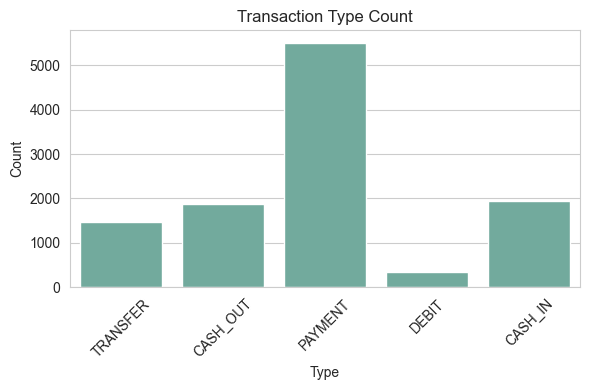

In [24]:
# 🎯 Plot transaction type distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', color='#69b3a2')
plt.title('Transaction Type Count')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# 💾 Save and show
plt.savefig("images/transaction_type_count.png", dpi=300)
plt.show()
plt.close()


📝 Observation:
The dataset has an imbalanced distribution of transaction types, with PAYMENT and CASH_IN being much more common.

📊 Univariate – Histograms for Numeric Features

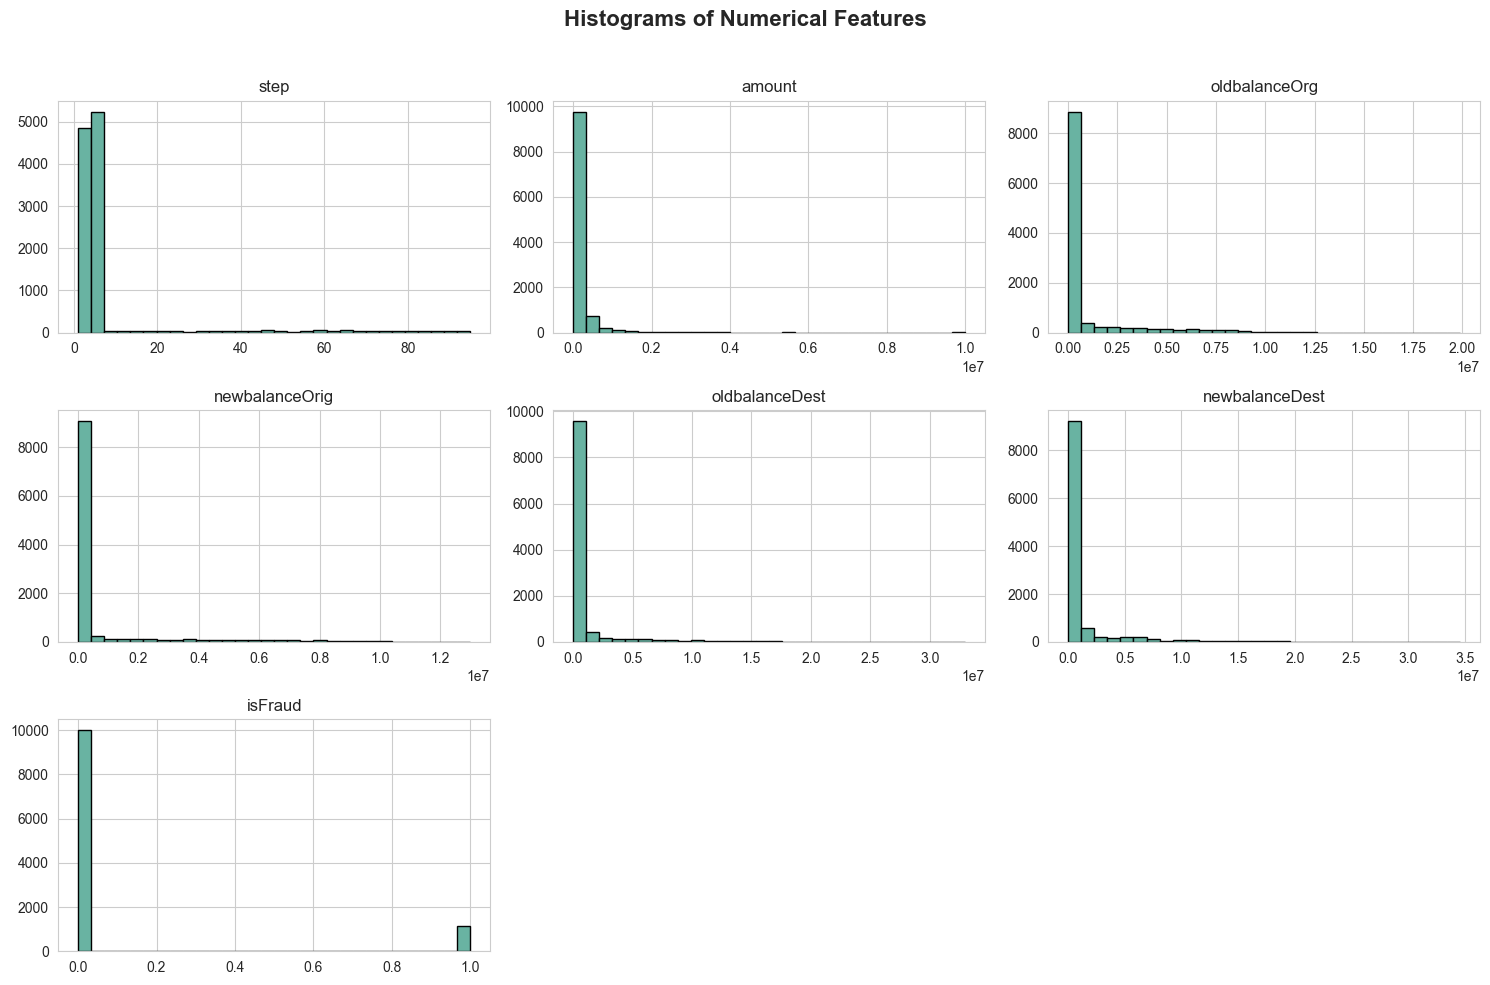

In [25]:
# 🎯 Plot histograms of all numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

sns.set_style("whitegrid")
df[numeric_cols].hist(bins=30, figsize=(15, 10), edgecolor='black', color='#69b3a2')
plt.suptitle('Histograms of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig("images/numerical_features_hist.png", dpi=300)
plt.show()
plt.close()


📝 Observation:
Numerical features (like amount, oldbalanceOrg, newbalanceOrig) are not normally distributed and have extreme values, which are expected in transaction data.
Avoid removing them as they may represent important fraud patterns.

📊 Bivariate – Transaction Type vs Fraud

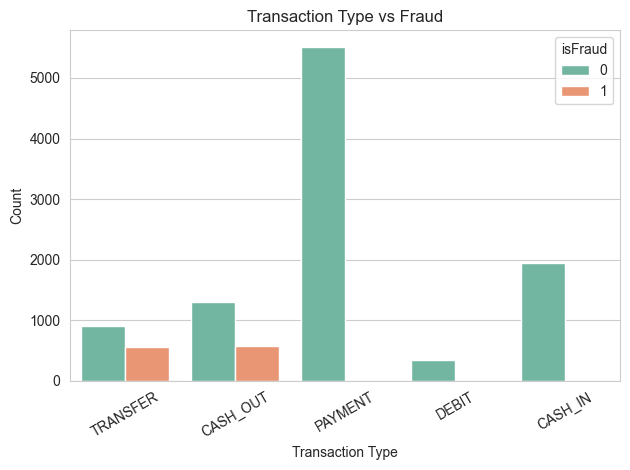

In [26]:
# 🎯 How does fraud vary across transaction types?
sns.countplot(data=df, x='type', hue='isFraud', palette="Set2")
plt.title("Transaction Type vs Fraud")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("images/transaction_type_vs_fraud.png", dpi=300)
plt.show()
plt.close()


📝 Observation:
Fraud occurs only in TRANSFER and CASH_OUT, making 'type' a potential leakage feature for fraud detection models.

📈 Correlation Matrix

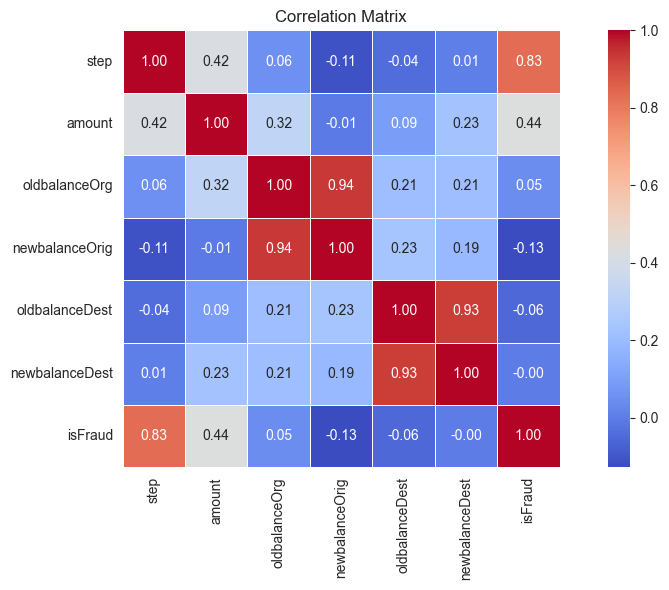

In [27]:
# 🎯 Visualizing correlation among numerical variables
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()

plt.savefig("images/correlation_matrix.png", dpi=300)
plt.show()
plt.close()


📝 Observation:
'step' is highly correlated (0.83) with isFraud.
We’ll dive deeper into how fraud varies over time steps.

📊 Fraud Distribution Over Time Steps (Binned)

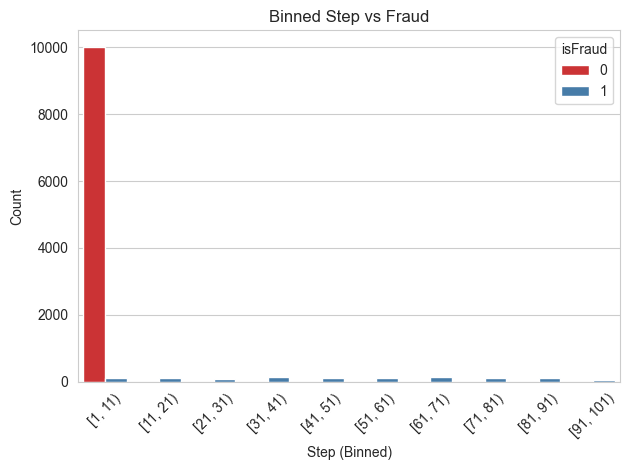

In [28]:
# 🎯 Group step into bins and visualize fraud count over time
min_step = df['step'].min()
max_step = df['step'].max()
bins = np.arange(min_step, max_step + 10, 10)  # Every 10 steps

df['step_bin'] = pd.cut(df['step'], bins=bins, right=False, include_lowest=True)

sns.countplot(data=df, x='step_bin', hue='isFraud', palette='Set1')
plt.title("Binned Step vs Fraud")
plt.xlabel("Step (Binned)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("images/step_bin_vs_fraud.png", dpi=300)
plt.show()
plt.close()


📝 Observation:
All non-fraud transactions occur before step 11, and fraud spikes heavily after that.
This might cause the model to overfit on time-based patterns, so we must handle 'step' carefully

⚖️ Target Variable Imbalance Check

isFraud
0    89.750494
1    10.249506
Name: proportion, dtype: float64


C:\Users\sumee\AppData\Local\Temp\ipykernel_26884\2766672786.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='isFraud', palette='Set2')


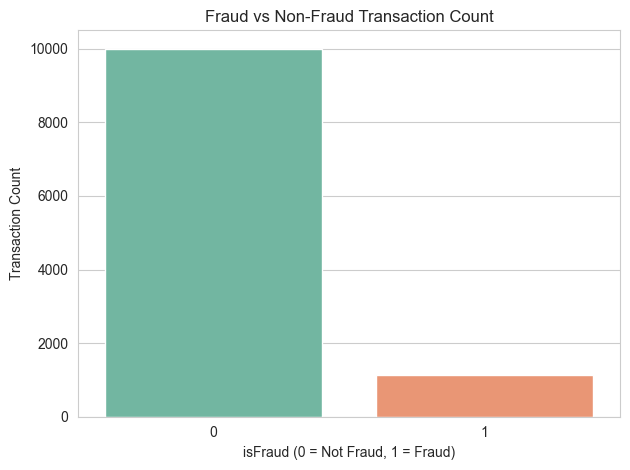

In [29]:
# 🎯 Check distribution of fraud vs non-fraud
fraud_dist = df['isFraud'].value_counts(normalize=True) * 100
print(fraud_dist)

sns.countplot(data=df, x='isFraud', palette='Set2')
plt.title("Fraud vs Non-Fraud Transaction Count")
plt.xlabel("isFraud (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Transaction Count")
plt.tight_layout()
plt.show()


📝 Observation:
The data is imbalanced:

89.75% Not Fraud

10.25% Fraud

We’ll handle this in the model using SMOTE or class weighting to ensure balanced learning.

In [38]:
df.groupby("isFraud")[["oldbalanceOrg"]].describe()


oldbalanceOrg                                                         \
                count          mean           std  min       25%         50%   
isFraud                                                                        
0             10000.0  8.904832e+05  2.130393e+06  0.0    121.75   21324.500   
1              1142.0  1.218636e+06  2.229806e+06  0.0  78028.89  348705.145   

                                  
                 75%         max  
isFraud                           
0         175112.615  12900000.0  
1        1218165.880  19900000.0

In [32]:
df.groupby("isFraud")[["newbalanceOrig"]].describe()


newbalanceOrig                                                   \
                 count           mean           std  min  25%       50%   
isFraud                                                                   
0              10000.0  915291.370016  2.181329e+06  0.0  0.0  10624.75   
1               1142.0   33944.321208  5.012930e+05  0.0  0.0      0.00   

                                 
               75%          max  
isFraud                          
0        176730.86  13000000.00  
1             0.00   9887819.06

Observation:
Fraudulent transactions often have newbalanceOrig = 0 and unusually high oldbalanceOrg. This creates an unrealistic pattern that allows the model to predict fraud just by spotting zero or extreme values — leading to label leakage.

👉 To prevent this shortcut learning, we will engineer more meaningful features (like balance difference) and drop the original balance columns.